<a href="https://colab.research.google.com/github/alex-smith-uwec/CS491/blob/main/GenderBias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
##Be patient...this will take some time to download..say 10 to 15 minutes!
import gensim.downloader as api
model = api.load('word2vec-google-news-300')


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [4]:
from sklearn.decomposition import PCA  # PCA implementation
import numpy as np

In [5]:
# Define your word pairs representing the dimension of interest
word_pairs = [
    ('he', 'she'),
    ('his', 'her'),
    ('man', 'woman'),
    ('John','Mary'),
    ('himself','herself'),
    ('son','daughter'),
    ('father','mother'),
    ('guy','gal'),
    ('boy','girl'),
    ('male','female')
]

# Calculate vector differences for each pair
vector_differences = np.array([model[w1] - model[w2] for w1, w2 in word_pairs])

# Apply PCA to these differences
pca = PCA(n_components=1)  # We're interested in the first principal component
pca.fit(vector_differences)

# The first principal component
gender_subspace = pca.components_[0]


In [7]:
# gender_subspace

In [17]:
# Optionally, you can now use this component to measure bias or similarity
# For a given word, you can calculate its projection on this subspace
word_vector = model['homemaker']  # Replace 'example' with your word of interest
bias_score = np.dot(word_vector, gender_subspace)
bias_score

-0.41457668

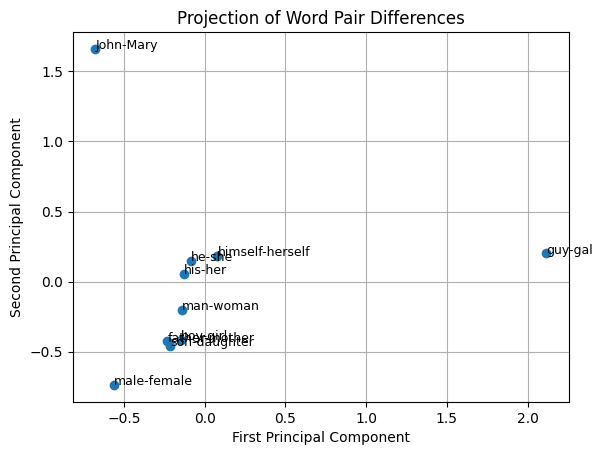

In [14]:

import matplotlib.pyplot as plt



# Apply PCA to these differences, considering two components
pca = PCA(n_components=2)  # Adjusted to compute two principal components
pca.fit(vector_differences)

# Extracting the first two principal components
first_principal_component = pca.components_[0]
second_principal_component = pca.components_[1]

# Projecting the vector differences onto the first two principal components
projected_points = pca.transform(vector_differences)

# Plotting the projected points
plt.scatter(projected_points[:, 0], projected_points[:, 1])
for i, word_pair in enumerate(word_pairs):
    plt.text(projected_points[i, 0], projected_points[i, 1], f'{word_pair[0]}-{word_pair[1]}', fontsize=9)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Projection of Word Pair Differences')
plt.grid(True)
plt.show()
